In [ ]:
from fastai.tabular import *
from fastai.basics import *
%matplotlib inline

In [ ]:
train_df = pd.read_pickle('data/data_clean')

In [ ]:
a=train_df.T[1]

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [ ]:
b=a.rename({"Day":"Pollution"})
b.rename('New York')

ambient temperature | (C)     13.0000
 wind speed (m/s)              0.4000
Irradiance DHI (W/m2)          0.0000
Irradiance DNI(W/m2)           0.0000
Sun altitude angle | (deg)   -65.2542
Sun azimuth angle(deg)        70.7090
DC power(kW)                   0.0000
Operating DC voltage(V)        0.0000
Month                          1.0000
Pollution                      1.0000
Hour                           1.0000
Name: New York, dtype: float64

In [ ]:
a.rename("New York")

ambient temperature | (C)     13.0000
 wind speed (m/s)              0.4000
Irradiance DHI (W/m2)          0.0000
Irradiance DNI(W/m2)           0.0000
Sun altitude angle | (deg)   -65.2542
Sun azimuth angle(deg)        70.7090
DC power(kW)                   0.0000
Operating DC voltage(V)        0.0000
Month                          1.0000
Day                            9.0000
Hour                           1.0000
Name: New York, dtype: float64

In [ ]:
len(train_df)

429240

In [ ]:
copy_df=train_df[train_df['DC power(kW)']!=0]

In [ ]:
len(copy_df)

207387

In [ ]:
copy_df

,ambient temperature | (C),wind speed (m/s),Irradiance DHI (W/m2),Irradiance DNI(W/m2),Sun altitude angle | (deg),Sun azimuth angle(deg),DC power(kW),Operating DC voltage(V),Month,Day,Hour
9,15,0.2,28,0,24.32370,144.402,0.004690,30.0000,1,1,9
10,14,0.2,82,0,30.32370,158.399,0.015769,30.0000,1,1,10
11,12,0.2,52,0,33.29290,174.267,0.009866,30.0000,1,1,11
12,12,0.3,136,0,32.74950,190.724,0.027535,30.0000,1,1,12
13,12,0.3,91,0,28.78830,206.120,0.017982,30.0000,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...
429227,-10,5.9,144,401,23.69900,173.772,0.112281,34.0768,12,31,11
429228,-10,5.8,135,438,23.45390,188.822,0.115428,34.0538,12,31,12
429229,-10,5.8,85,819,20.42180,203.330,0.152344,33.8393,12,31,13
429230,-10,5.7,69,731,14.95850,216.623,0.111538,34.0393,12,31,14


In [ ]:
procs=[FillMissing, Categorify, Normalize]

In [ ]:
cat_vars=['Month','Day','Hour']
cont_vars=['ambient temperature | (C)',' wind speed (m/s)','Irradiance DHI (W/m2)',
           'Irradiance DNI(W/m2)','Sun altitude angle | (deg)','Sun azimuth angle(deg)']
dep_var='DC power(kW)'

In [ ]:
df = train_df[cat_vars + cont_vars + [dep_var]].copy()
# df = copy_df[cat_vars + cont_vars + [dep_var]].copy()

In [ ]:
df[dep_var]=df[dep_var]*100 + 0.00001

In [ ]:
np.max(df['DC power(kW)'])

0.242373

In [ ]:
data = (TabularList.from_df(df, path='data', cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_none()
                .label_from_df(cols=dep_var)
                .databunch())

In [ ]:
max_y=np.max(train_df[dep_var]*100)*1.1
max_y


26.661030000000004

In [ ]:
y_range = torch.tensor([0, max_y], device=defaults.device)

In [ ]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=rmse)

In [ ]:
learn.summary()

TabularModel
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [7]                  91         True      
______________________________________________________________________
Embedding            [11]                 352        True      
______________________________________________________________________
Embedding            [8]                  136        True      
______________________________________________________________________
Dropout              [26]                 0          False     
______________________________________________________________________
BatchNorm1d          [6]                  12         True      
______________________________________________________________________
Linear               [1000]               33,000     True      
______________________________________________________________________
ReLU                 [1000]               0          False     
_________________________________________________

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


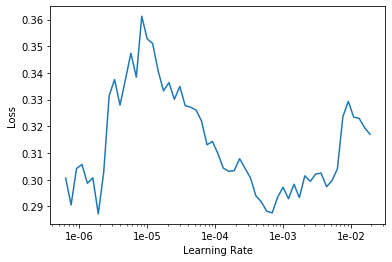

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, 5e-3, wd=0.)

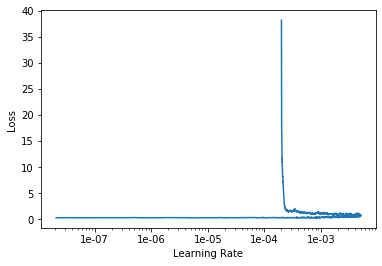

In [ ]:
learn.recorder.plot()

In [ ]:
learn.save('1')

In [ ]:
learn.load('1');

In [ ]:
learn.fit(10, 1e-5)

epoch,train_loss,valid_loss,root_mean_squared_error,time


KeyboardInterrupt: 

In [ ]:
learn.export()

In [ ]:
np.mean(df[dep_var])

7.929026609861057

In [ ]:
a=DataFrame(df[df[dep_var]!=0])
# a=copy_df

In [ ]:
b=a.index.values.tolist()

In [ ]:
len(a)

207387

In [ ]:
percenterror=[]
actual=[]
predictions=[]
day=[]
hour=[]
for i in range(int(200)):
     num=abs(learn.predict(a.T[b[i]])[0].obj-a[dep_var][b[i]]*100)*100/(a[dep_var][b[i]]*100)
#         print(num)
     percenterror.append(num.item())
     actual.append(a[dep_var][b[i]]*100)
     predictions.append(learn.predict(a.T[b[i]])[0].obj.item())
     day.append(int(a.T[b[i]]['Day']))
     hour.append(int(a.T[b[i]]['Hour']))
        
#     print((b[i]==index))
    

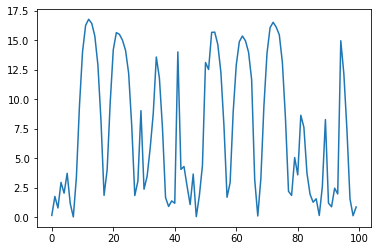

In [ ]:
plt.plot(predictions[:100])

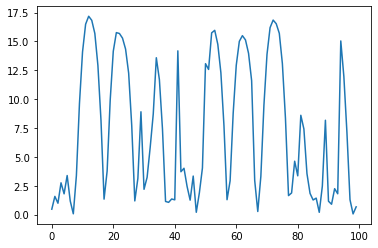

In [ ]:
plt.plot(actual[:100])

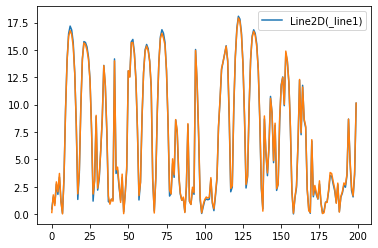

In [ ]:
plt.legend(plt.plot(actual),plt.plot(predictions))

In [ ]:
type(int(a.T[b[0]]['Hour']))

int

In [ ]:
pd.DataFrame((day,hour,predictions,actual,percenterror)).T.to_excel('Results_copy.xls')